In [1]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pylab as plt
%matplotlib inline
import re
import gc
import glob


In [5]:
import csv

In [6]:

df1 = pd.read_csv("parking-tickets-2013/Parking_Tags_Data_2013.csv", quoting=csv.QUOTE_NONE, error_bad_lines=False)
df2 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_1.csv")
df3 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_2.csv")
df4 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_3.csv")
df5 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_4.csv")
data0 = pd.read_csv("parking-tickets-2017/Parking_Tags_Data_2017_1.csv")
data1 = pd.read_csv("parking-tickets-2017/Parking_Tags_Data_2017_2.csv")
data2 = pd.read_csv("parking-tickets-2017/Parking_Tags_Data_2017_3.csv")
data3 = pd.read_csv("parking-tickets-2018/Parking_Tags_Data_2018_1.csv")
data4 = pd.read_csv("parking-tickets-2018/Parking_Tags_Data_2018_2.csv")
data5 = pd.read_csv("parking-tickets-2018/Parking_Tags_Data_2018_3.csv")



b'Skipping line 15741: expected 11 fields, saw 14\n'
b'Skipping line 120129: expected 11 fields, saw 12\n'
b'Skipping line 178600: expected 11 fields, saw 12\n'
b'Skipping line 265260: expected 11 fields, saw 12\n'
b'Skipping line 448877: expected 11 fields, saw 12\n'
b'Skipping line 481658: expected 11 fields, saw 12\n'
b'Skipping line 582687: expected 11 fields, saw 13\n'
b'Skipping line 678495: expected 11 fields, saw 12\n'
b'Skipping line 787166: expected 11 fields, saw 12\n'
b'Skipping line 925038: expected 11 fields, saw 12\n'
b'Skipping line 1341891: expected 11 fields, saw 12\n'
b'Skipping line 1574918: expected 11 fields, saw 12\n'
b'Skipping line 1648058: expected 11 fields, saw 12\nSkipping line 1675730: expected 11 fields, saw 13\n'
b'Skipping line 1766723: expected 11 fields, saw 12\n'
b'Skipping line 2129390: expected 11 fields, saw 12\n'
b'Skipping line 2207768: expected 11 fields, saw 12\n'


In [7]:
new_df = pd.concat([df1, df2, df3, df4, df5,data0, data1, data2, data3, data4, data5])

In [8]:
records = len(data0.index)
record1 = len(data1.index)
record2 = len(data2.index)
record3 = len(data3.index)
record4 = len(data4.index)
record5 = len(data5.index)
print("The number of tickets generated in 2018 is:", records + record1 +record2)

print("The number of tickets generated in 2017 is:", record3 + record5 + record4)

The number of tickets generated in 2018 is: 2144226
The number of tickets generated in 2017 is: 2044288


In [10]:
records = len(new_df.index)
print(records)

9286636


In [9]:
new_df.head(25)


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***66151,20130101,3.0,PARK/LEAVE ON PRIVATE PROPERTY,30,0.0,AT,1360 DANFORTH AVE,NaN,NaN,ON
1,***41457,20130101,9.0,STOP-HWY-PROHIBITED TIMES/DAYS,60,1.0,NR,1709 ST CLAIR AVE W,NaN,NaN,ON
2,***41458,20130101,9.0,STOP-HWY-PROHIBITED TIMES/DAYS,60,2.0,NR,1687 ST CLAIR AVE W,NaN,NaN,ON
3,***85394,20130101,192.0,STAND SIGNED TRANSIT STOP,60,3.0,NR,5140 YONGE ST,NaN,NaN,ON
4,***57816,20130101,8.0,STD VEH HWY PROHIB TIME/DAY,60,4.0,OPP,227 VICTORIA ST,NaN,NaN,ON
5,***82226,20130101,8.0,STD VEH HWY PROHIB TIME/DAY,60,4.0,NR,224 VICTORIA ST,NaN,NaN,ON
6,***85395,20130101,192.0,STAND SIGNED TRANSIT STOP,60,6.0,NR,5140 YONGE ST,NaN,NaN,ON
7,***31776,20130101,3.0,PARK/LEAVE ON PRIVATE PROPERTY,30,10.0,NaN,270 THE KINGSWAY,NaN,NaN,ON
8,***57817,20130101,9.0,STOP HWY PROHIBITED TIME/DAY,60,11.0,W/S,VICTORIA ST,N/O,DUNDAS ST E,ON
9,***82227,20130101,9.0,STOP HWY PROHIBITED TIME/DAY,60,11.0,W/S,VICTORIA ST,N/O,DUNDAS ST E,ON


In [9]:
new_df.tail(10)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
544278,***00613,20181231,8.0,STAND VEH.-PROHIBIT TIME/DAY,60,2354.0,NR,50 BRIAN HARRISON WAY,NaN,NaN,ON
544279,***29023,20181231,3.0,PARK ON PRIVATE PROPERTY,30,2355.0,AT,2110 KEELE ST,NaN,NaN,ON
544280,***29428,20181231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2356.0,NR,15 BEACONSFIELD AVE,NaN,NaN,ON
544281,***00614,20181231,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,2356.0,NR,25 TOWN CENTRE CRT,NaN,NaN,ON
544282,***29429,20181231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2357.0,NR,15 BEACONSFIELD AVE,NaN,NaN,ON
544283,***00696,20181231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2357.0,NR,282 GILLARD AVE,NaN,NaN,ON
544284,***43620,20181231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2357.0,NR,1404 DANFORTH AVE,NaN,NaN,ON
544285,***29024,20181231,3.0,PARK ON PRIVATE PROPERTY,30,2358.0,AT,2110 KEELE ST,NaN,NaN,ON
544286,***28387,20181231,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,2359.0,NR,40 SPRING GARDEN AVE,NaN,NaN,ON
544287,***43621,20181231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2359.0,NR,1316 DANFORTH AVE,NaN,NaN,ON


In [10]:
new_df.drop_duplicates()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***39755,20170101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,45 LEWIS ST,NaN,NaN,ON
1,***10593,20170101,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,1.0,OPP,5 MERCER ST,NaN,NaN,ON
2,***39756,20170101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,55 LEWIS ST,NaN,NaN,ON
3,***92318,20170101,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1.0,N/S,MAPLEWOOD AVE,W/O,VAUGHAN RD,ON
4,***39757,20170101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,61 LEWIS ST,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
544283,***00696,20181231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2357.0,NR,282 GILLARD AVE,NaN,NaN,ON
544284,***43620,20181231,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2357.0,NR,1404 DANFORTH AVE,NaN,NaN,ON
544285,***29024,20181231,3.0,PARK ON PRIVATE PROPERTY,30,2358.0,AT,2110 KEELE ST,NaN,NaN,ON
544286,***28387,20181231,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,2359.0,NR,40 SPRING GARDEN AVE,NaN,NaN,ON


In [11]:
no_of_records = len(new_df.index)
print(no_of_records)

4188514


In [12]:
sum1 = new_df['set_fine_amount'].sum()
print("The total Revenue of year 2015 and 2016 is: CA$",sum1)


The total Revenue of year 2015 and 2016 is: CA$ 206406755


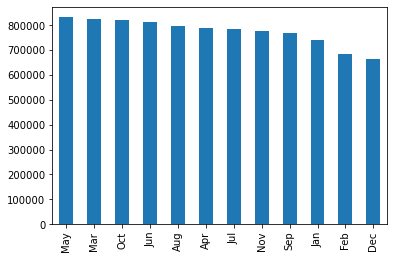

In [11]:
new_df['month_num'] = pd.to_datetime(new_df['date_of_infraction'],format='%Y%m%d').dt.month
new_df['month'] =new_df['month_num'].apply(lambda x: calendar.month_abbr[x])
new_df['month'].value_counts().plot(kind='bar')
plt.show()

In [12]:
new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Group by month and year, and sum the 'sales_amount' for each month-year combination
monthly_revenue = new_df.groupby(new_df['date_of_infraction'].dt.to_period('M'))['set_fine_amount'].sum()

# Print the result
print(monthly_revenue)

date_of_infraction
2013-01    8367170
2013-02    7345385
2013-03    8937225
2013-04    9204430
2013-05    9639080
2013-06    9423610
2013-07    9403005
2013-08    9460350
2013-09    9035625
2013-10    9488730
2013-11    9306625
2013-12    6942285
2014-01    8055305
2014-02    7978190
2014-03    9782100
2014-04    9531150
2014-05    9952790
2014-06    9741330
2014-07    9249455
2014-08    9016295
2014-09    8924520
2014-10    9176280
2014-11    8817240
2014-12    8762685
2017-01    9540230
2017-02    8474385
2017-03    9858135
2017-04    8696825
2017-05    9342155
2017-06    9156875
2017-07    9029465
2017-08    9488535
2017-09    8571780
2017-10    8702720
2017-11    8179070
2017-12    7159885
2018-01    7736405
2018-02    7135105
2018-03    8875475
2018-04    8167140
2018-05    8713265
2018-06    8420405
2018-07    8239205
2018-08    8383345
2018-09    7979300
2018-10    9547775
2018-11    8796775
2018-12    8212500
Freq: M, Name: set_fine_amount, dtype: int64


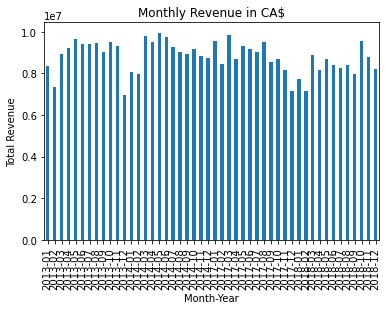

In [13]:
monthly_revenue.plot.bar()

plt.title('Monthly Revenue in CA$')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')

plt.show()

In [14]:
revenue_2017 = monthly_revenue[monthly_revenue.index.year == 2017]
total_revenue_2017 = revenue_2017.sum()
print("Total Revenue of Parking Tickets for 2017 is: CA$", total_revenue_2017)

revenue_2018 = monthly_revenue[monthly_revenue.index.year == 2018]
total_revenue_2018 = revenue_2018.sum()
print("Total Revenue of Parking Tickets for 2018 is: CA$", total_revenue_2018)

Total Revenue of Parking Tickets for 2017 is: CA$ 106200060
Total Revenue of Parking Tickets for 2018 is: CA$ 100206695


In [15]:
#new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the week number
#new_df['week_number'] = new_df['date_of_infraction'].dt.isocalendar().week

# Print the DataFrame to see the results
#print(new_df.head())


new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

new_df['day_of_week'] = new_df['date_of_infraction'].dt.strftime('%A')

print(new_df.head())

  tag_number_masked date_of_infraction  infraction_code  \
0          ***66151         2013-01-01              3.0   
1          ***41457         2013-01-01              9.0   
2          ***41458         2013-01-01              9.0   
3          ***85394         2013-01-01            192.0   
4          ***57816         2013-01-01              8.0   

           infraction_description  set_fine_amount  time_of_infraction  \
0  PARK/LEAVE ON PRIVATE PROPERTY               30                 0.0   
1  STOP-HWY-PROHIBITED TIMES/DAYS               60                 1.0   
2  STOP-HWY-PROHIBITED TIMES/DAYS               60                 2.0   
3       STAND SIGNED TRANSIT STOP               60                 3.0   
4     STD VEH HWY PROHIB TIME/DAY               60                 4.0   

  location1            location2 location3 location4 province  month_num  \
0        AT    1360 DANFORTH AVE       NaN       NaN       ON          1   
1        NR  1709 ST CLAIR AVE W       NaN      

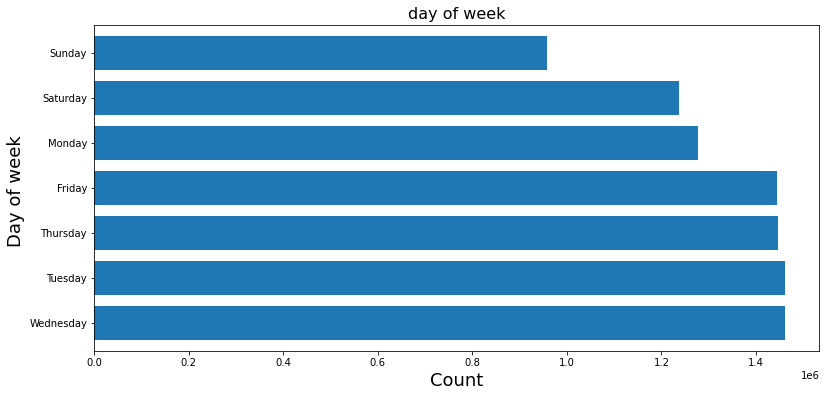

In [16]:
new_df['day_of_week'].value_counts().plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("day of week", fontsize=16)
plt.ylabel("Day of week ", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.show()



The data includes 9,286,636 tickets given out across 1460 days. The date range 
spans 2190 days from 2013-01-01 to 2018-12-31 .



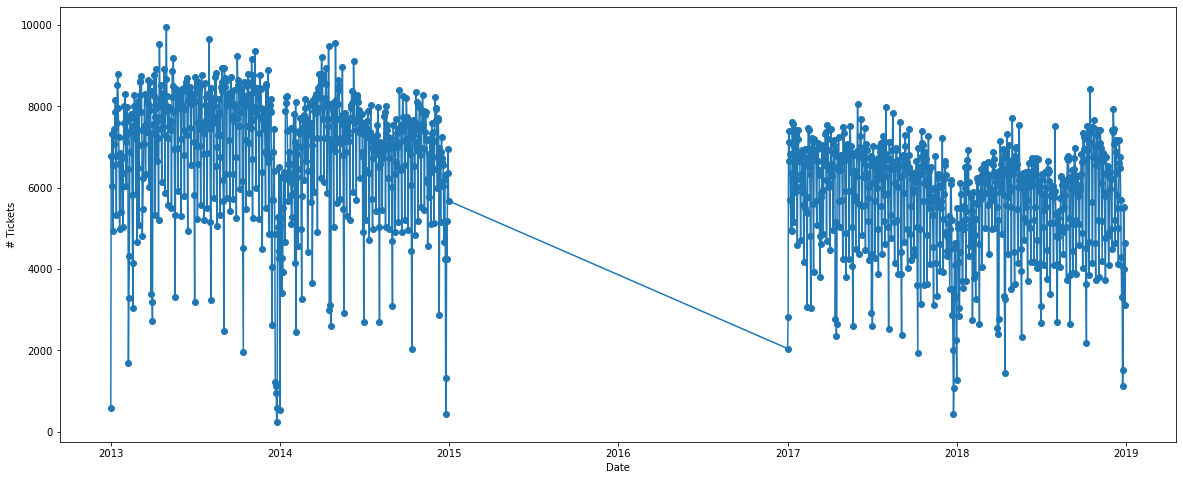

16575

In [17]:
cntIns = new_df.groupby(['date_of_infraction']).size().reset_index(name='count')

x = pd.DataFrame(pd.to_datetime(cntIns['date_of_infraction'],format='%Y%m%d').dt.date)
y = pd.DataFrame(cntIns['count'])

timePlot = pd.concat([x,y], axis=1)

cntObs = timePlot['count'].sum() # count of observations
cntDays = y.shape[0] # count of days

minDate = timePlot['date_of_infraction'].min() # date of first observation
maxDate = timePlot['date_of_infraction'].max() # datet of last observation

dateRange = re.split('\,', str(maxDate - minDate))
dateRange = dateRange[0]

print("\n\nThe data includes", "{:,}".format(cntObs), "tickets given out across", cntDays, "days. The date range \nspans", dateRange, "from", minDate, "to", maxDate, ".\n")

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(xlabel='Date', ylabel='# Tickets')
ax.plot_date(x=timePlot['date_of_infraction'], y=timePlot['count'],ls='-', marker='o')
plt.show()
del x, y, timePlot, fig, ax
gc.collect()

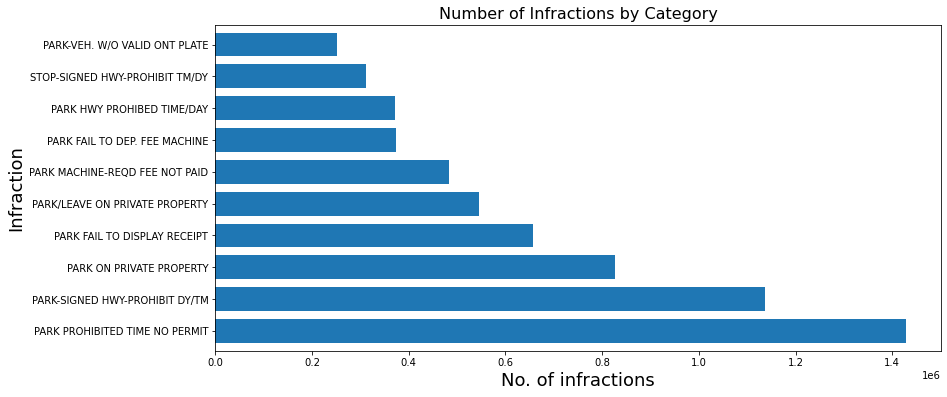

In [18]:
new_df['infraction_description'].value_counts().nlargest(10).plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("Number of Infractions by Category", fontsize=16)
plt.ylabel("Infraction", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [19]:
fine_by_infraction = new_df.groupby('infraction_description')['set_fine_amount'].sum()

In [20]:
print(fine_by_infraction)

infraction_description
ANGLE PARK-TOO FAR FROM METER       30
FAIL ANGLE PARK/STOP AT 45 DEG     180
FAIL PARK/STOP CLOSE AS PRACT       45
FAIL PARK/STOP PAR CURB LEFT S      15
FAIL PARK/STOP PAR CURB LF SID      15
                                  ... 
STOP/STAND/PARK - NO VEND ZONE     120
STOP/STAND/PARK DESIGNATE AREA       0
STOP/STAND/PARK VEND CONT ZONE    4740
STOP/STAND/PARK VEND NO PERMIT     630
STOP=BSD OBSTR RDWY-IMPEDE TRF    4920
Name: set_fine_amount, Length: 467, dtype: int64


In [21]:
sorted_data = fine_by_infraction.sort_values(ascending=False)

top_10_infractions = sorted_data.head(10)


print(top_10_infractions)

infraction_description
PARK-SIGNED HWY-PROHIBIT DY/TM    52626370
PARK PROHIBITED TIME NO PERMIT    42856890
STOP-SIGNED HIGHWAY-RUSH HOUR     29421900
PARK ON PRIVATE PROPERTY          24799110
PARK FAIL TO DISPLAY RECEIPT      19731810
STOP-SIGNED HWY-PROHIBIT TM/DY    18684420
PARK IN A FIRE ROUTE              17049000
PARK/LEAVE ON PRIVATE PROPERTY    16350960
PARK HWY PROHIBED TIME/DAY        14835400
PARK MACHINE-REQD FEE NOT PAID    14517570
Name: set_fine_amount, dtype: int64


In [22]:
pd.crosstab(index=new_df['province'], columns='count').nlargest(10,'count')

col_0,count
province,
ON,8840943
QC,138002
AB,46265
NY,30361
BC,22666
NS,19467
AZ,16955
MI,15962
FL,13821


In [23]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(10,'count')

count       9285329
unique        34683
top        YONGE ST
freq         246992
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,246992
BLOOR ST W,185745
QUEEN ST W,159004
DANFORTH AVE,145673
QUEEN ST E,114674
KING ST W,108962
COLLEGE ST,101859
DUNDAS ST W,92530
ST CLAIR AVE W,85573


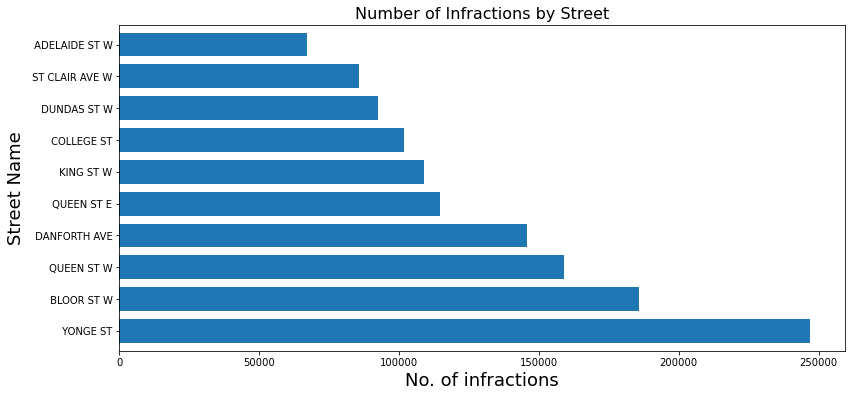

In [24]:
tempticks['location2'].value_counts().nlargest(10).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [25]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(15,'count')

count       9285329
unique        34683
top        YONGE ST
freq         246992
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,246992
BLOOR ST W,185745
QUEEN ST W,159004
DANFORTH AVE,145673
QUEEN ST E,114674
KING ST W,108962
COLLEGE ST,101859
DUNDAS ST W,92530
ST CLAIR AVE W,85573


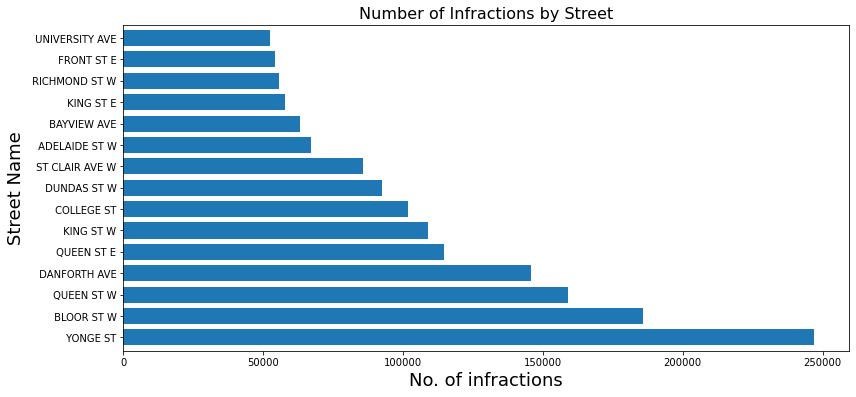

In [26]:
tempticks['location2'].value_counts().nlargest(15).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

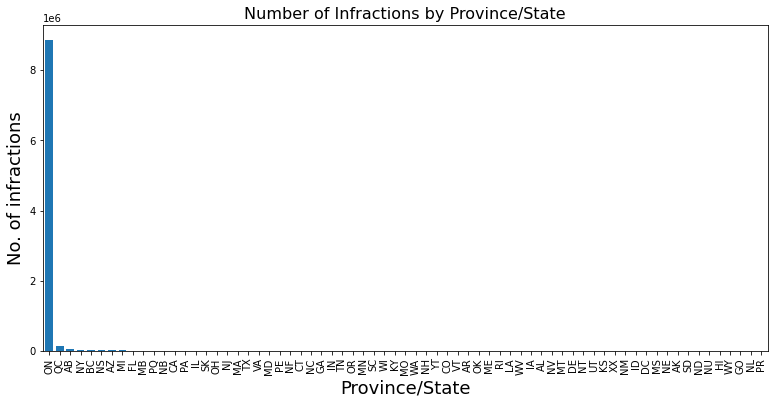

In [27]:
new_df['province'].value_counts().plot(kind='bar',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Province/State", fontsize=16)
plt.xlabel("Province/State", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()

In [28]:
new_df['locality'] = new_df['province'].apply(lambda x: 'Ontario' if x=='ON' else 'Other')
pd.crosstab(index=new_df['locality'], columns='count')

col_0,count
locality,
Ontario,8840943
Other,445693


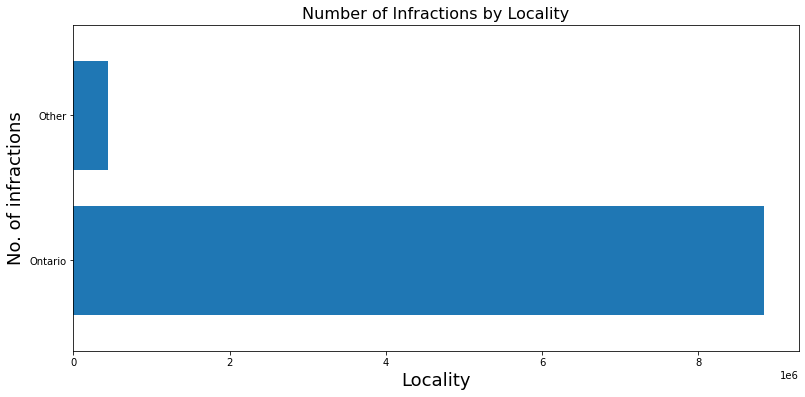

In [29]:
new_df['locality'].value_counts().plot(kind='barh',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Locality", fontsize=16)
plt.xlabel("Locality", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()